In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from tensorflow.keras.datasets import fashion_mnist
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.svm import SVC
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.datasets import fashion_mnist
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sn
import pandas.util.testing as tm

In [4]:
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()
trainX[:2]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

### Labels
Each training and test example is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |


In [5]:
labels, indices = np.unique(trainY[15:], return_index=True)

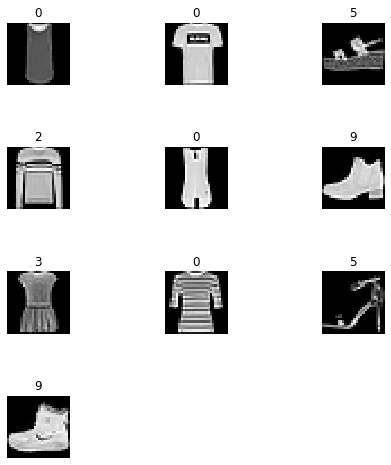

In [6]:
def print_exmple(trainX):
    fig = plt.figure(figsize=(8,8))
    for count,index in enumerate(indices):
        ax = fig.add_subplot(4, 3, count+1)
        ax.imshow(trainX[index], cmap=plt.get_cmap('gray'))
        ax.axis("off")
        ax.set_title(trainY[index])
    plt.subplots_adjust(hspace=1)
    plt.show()
    
print_exmple(trainX)

In [14]:
train_df = pd.DataFrame(trainX.reshape(len(testX),28*28))
corr = train_df.corr()

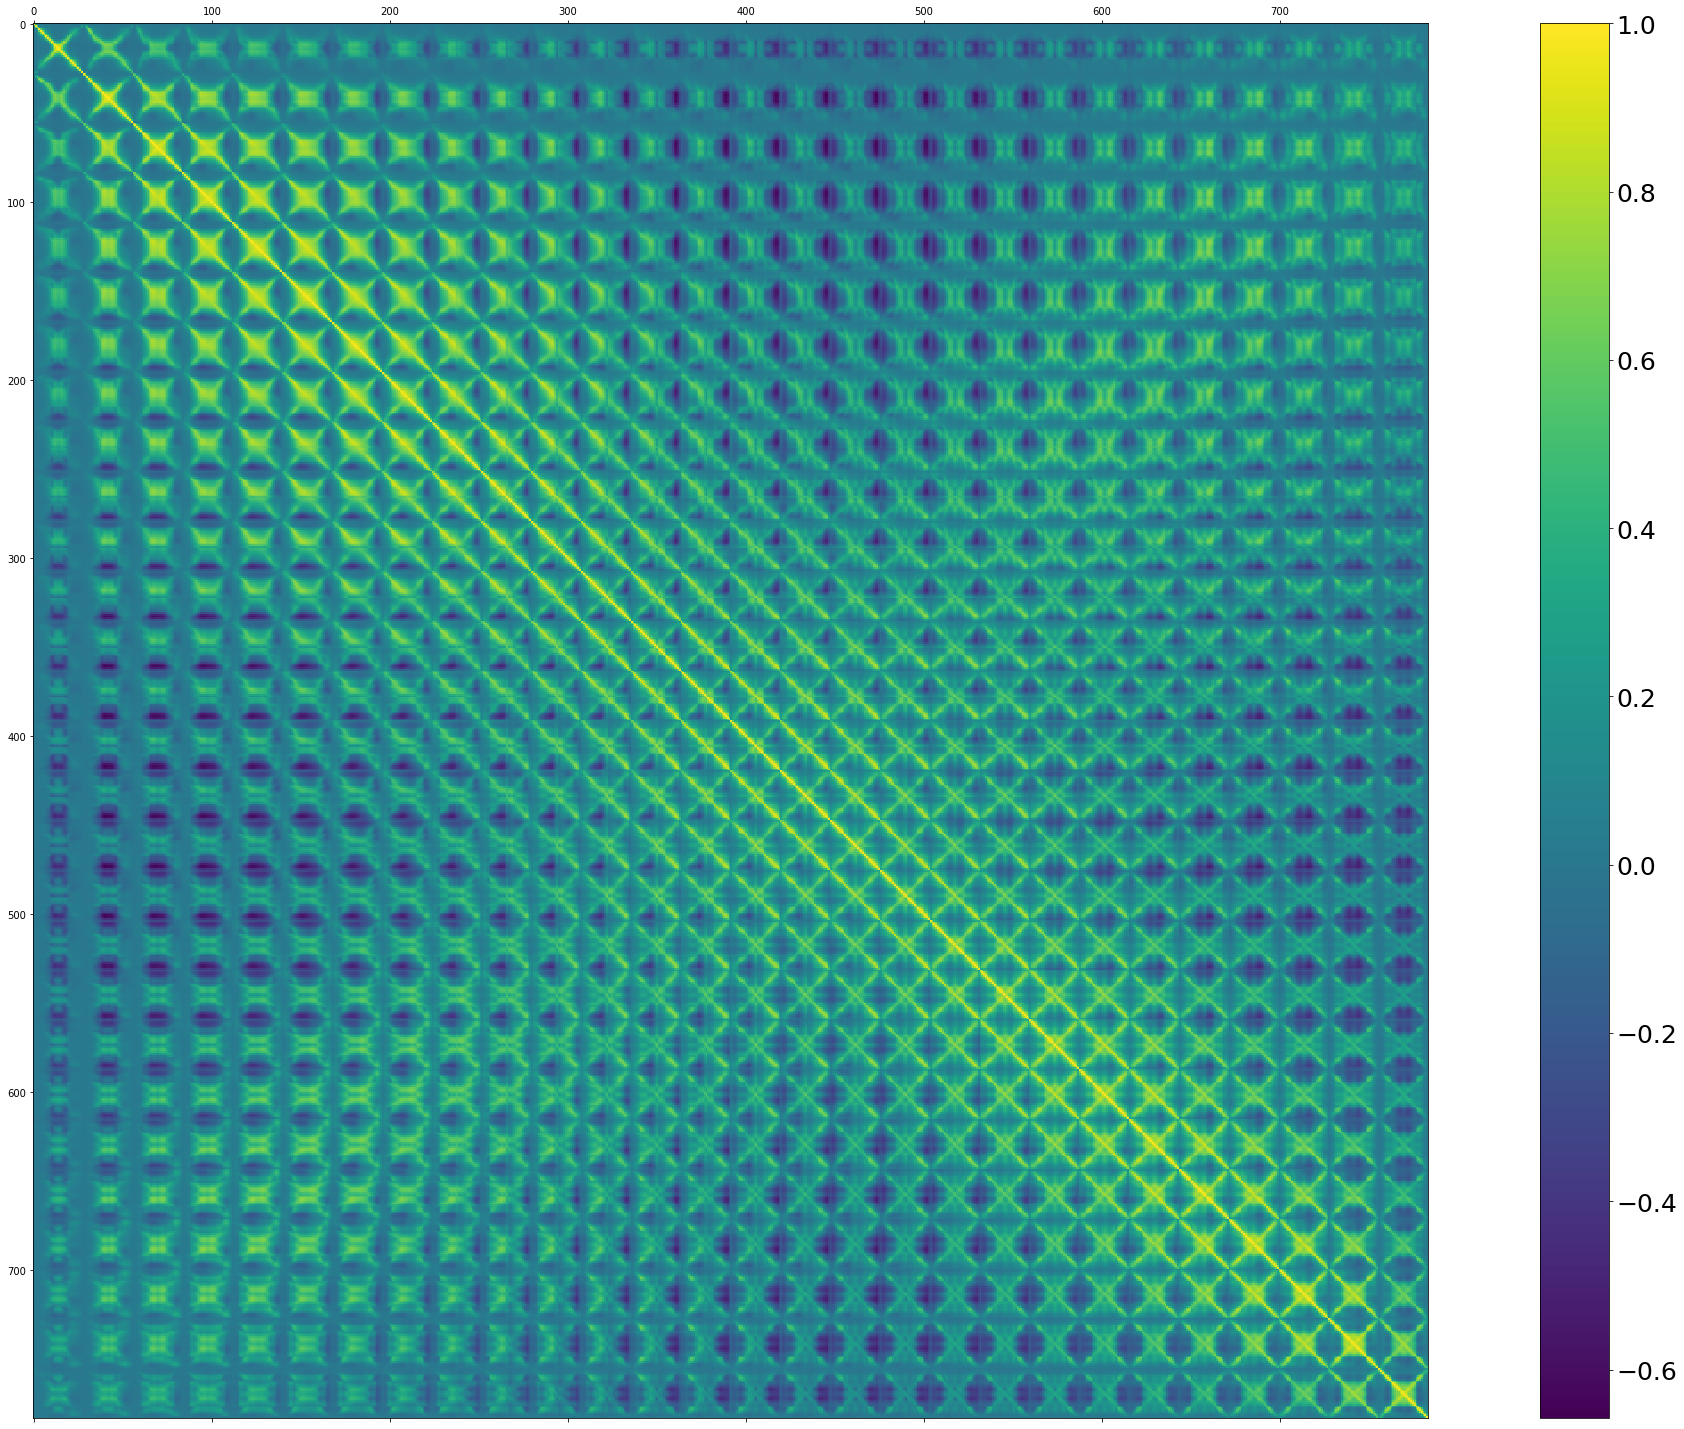

In [21]:
f = plt.figure(figsize=(40, 25))
plt.matshow(corr, fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=25)
plt.show()

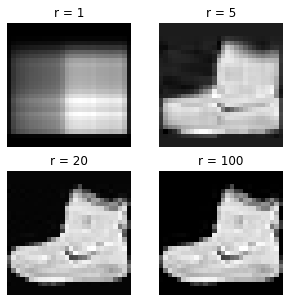

In [6]:
U,S,V_t = np.linalg.svd(trainX[0],full_matrices=False)
S = np.diag(S)
fig = plt.figure(figsize=(5,5))

for j,r in enumerate([1,5,20,100]):
    X = U[:,:r] @ S[0:r,:r] @ V_t[:r,:]
    ax = fig.add_subplot(2, 2, j+1)
    img = plt.imshow(X)
    img.set_cmap("gray")
    ax.axis("off")
    ax.set_title("r = " + str(r))
plt.show()

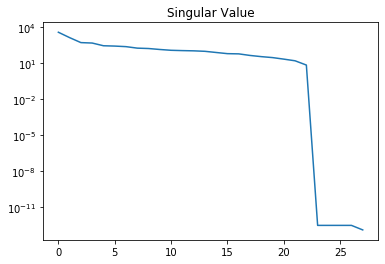

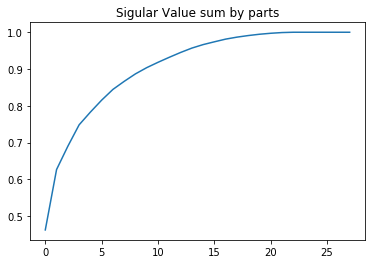

In [8]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title("Singular Value")
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title("Sigular Value sum by parts")
plt.show()

In [4]:
print(trainX.shape)
trainX = trainX.reshape(len(trainX),28*28)
print(trainX.shape)
testX = testX.reshape(len(testX),28*28)

(60000, 28, 28)
(60000, 784)


In [23]:
pca = PCA(n_components=20)
pca.fit(trainX)
X_pc = pca.transform(trainX)
n_pcs= pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = range(28*28)
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

df = pd.DataFrame(dic.items())

In [24]:
filterd_features = df[1]
knn = KNeighborsClassifier(n_neighbors=5,p=1,weights="distance")
knn.fit(trainX[:,filterd_features],trainY)
#dec_t = tree.DecisionTreeClassifier(random_state=0, max_depth=8).fit(trainX[:,filterd_features],trainY)
y_pred = knn.predict(testX[:,filterd_features])
print(classification_report(y_pred,testY))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74      1019
           1       0.94      0.93      0.94      1011
           2       0.71      0.68      0.69      1044
           3       0.78      0.81      0.79       960
           4       0.69      0.70      0.69       977
           5       0.75      0.81      0.78       923
           6       0.54      0.59      0.56       910
           7       0.76      0.74      0.75      1017
           8       0.90      0.87      0.89      1033
           9       0.91      0.82      0.86      1106

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000



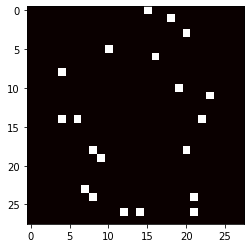

In [29]:
features = np.zeros(28*28,dtype=int)
for i in filterd_features:
    features[i]=255
plt.imshow(features.reshape(28,28),cmap="hot",interpolation='nearest')

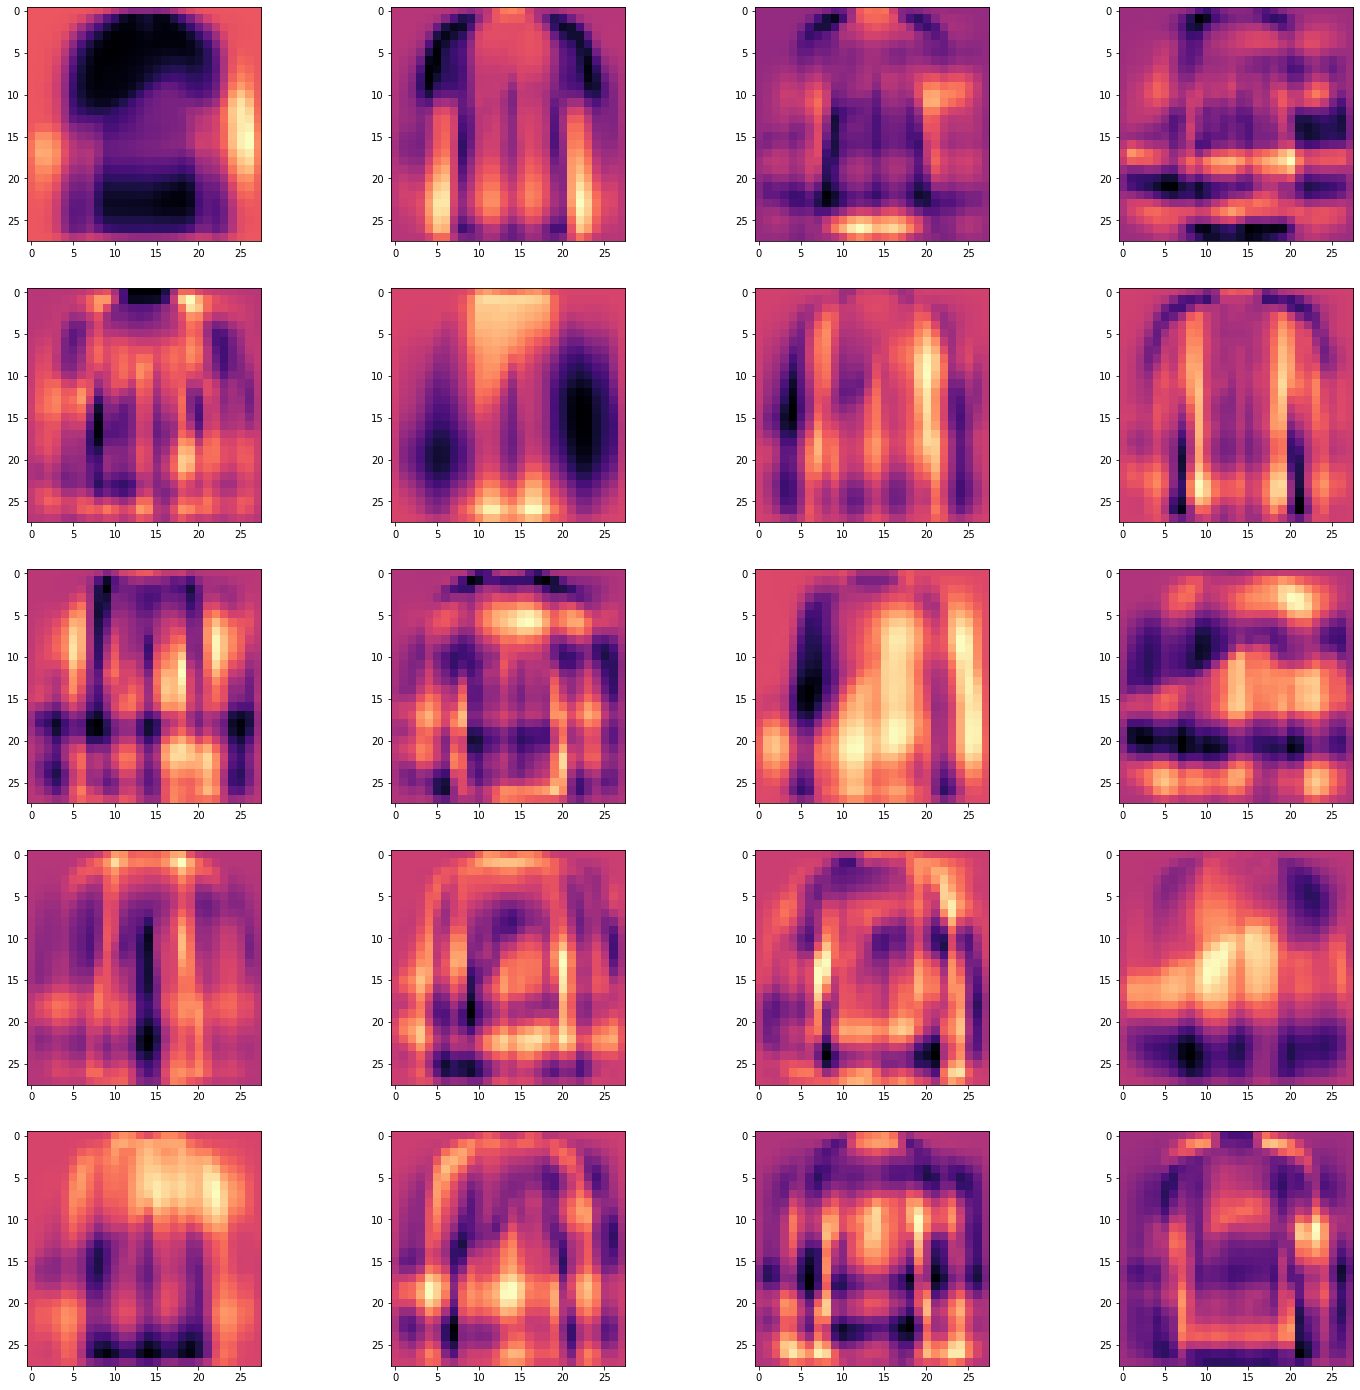

In [95]:
fig,ax = plt.subplots(5,4,figsize=(25,25))
for i,pca_com in enumerate(pca.components_):
    ax[i%5][i%4].imshow(pca_com.reshape(28,28),cmap="magma_r",interpolation='nearest')
plt.show()

In [28]:
pca = PCA(n_components=23)
pca.fit(trainX)
compressed_trainX = pca.transform(trainX)
decompressed_trainX = pca.inverse_transform(compressed_trainX)
compressed_testX = pca.transform(testX)
decompressed_testX = pca.inverse_transform(compressed_testX)

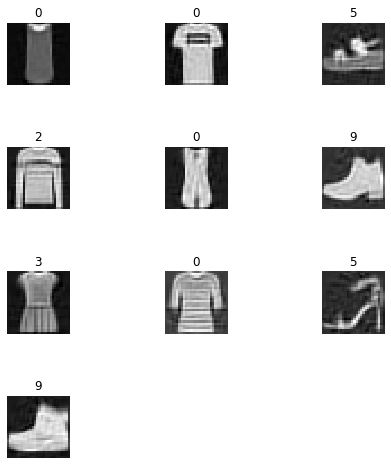

In [68]:
print_exmple(decompressed_trainX.reshape(len(decompressed_trainX),28,28))

In [8]:
def validate(model,x_train,x_test):
    model.fit(x_train, trainY)
    scores = cross_val_score(model,x_test, testY, cv=10)
    return(scores.mean())

In [16]:
svc=SVC(C=10,kernel='poly',gamma="auto")
svc.fit(trainX,trainY)

C:\Users\magshimim\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [17]:
y_pred = svc.predict(testX)
print(classification_report(testY, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1000
           1       0.97      0.98      0.97      1000
           2       0.75      0.82      0.78      1000
           3       0.88      0.85      0.87      1000
           4       0.81      0.77      0.79      1000
           5       0.96      0.96      0.96      1000
           6       0.70      0.65      0.68      1000
           7       0.95      0.94      0.95      1000
           8       0.96      0.96      0.96      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [19]:
svc=SVC(C=10,kernel='poly',gamma="auto")
svc.fit(compressed_trainX,trainY)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
y_pred = svc.predict(compressed_testX)
print(classification_report(testY, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.79      0.82      0.80      1000
           3       0.91      0.90      0.90      1000
           4       0.82      0.81      0.82      1000
           5       0.98      0.96      0.97      1000
           6       0.71      0.69      0.70      1000
           7       0.94      0.96      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [9]:
naive_bayes_model = GaussianNB()
print(validate(naive_bayes_model,trainX,testX))
print(validate(naive_bayes_model,compressed_trainX,compressed_testX))

0.5708
0.7333999999999999


In [12]:
naive_bayes_model.fit(compressed_trainX,trainY)
y_pred = naive_bayes_model.predict(compressed_testX)
print(classification_report(testY, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1000
           1       0.95      0.87      0.91      1000
           2       0.70      0.63      0.66      1000
           3       0.80      0.73      0.76      1000
           4       0.72      0.67      0.69      1000
           5       0.79      0.71      0.75      1000
           6       0.51      0.49      0.50      1000
           7       0.74      0.85      0.79      1000
           8       0.59      0.85      0.70      1000
           9       0.93      0.85      0.89      1000

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.75      0.74      0.74     10000



              precision    recall  f1-score   support

           0       0.75      0.64      0.69      1000
           1       0.66      0.92      0.77      1000
           2       0.70      0.63      0.66      1000
           3       0.82      0.55      0.66      1000
           4       0.72      0.66      0.69      1000
           5       0.79      0.71      0.75      1000
           6       0.51      0.44      0.47      1000
           7       0.74      0.85      0.79      1000
           8       0.59      0.85      0.70      1000
           9       0.93      0.85      0.89      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



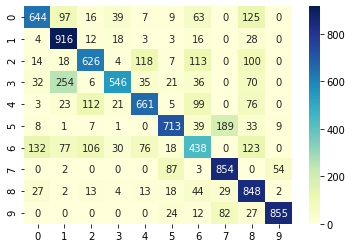

In [62]:
def predict_with_bias(model,x_test,bias,HIGH_PRIORITY_CLASS = 1):
    y_pred_prob = model.predict_proba(x_test)
    y_pred = []
    for sample in y_pred_prob:
        if(sample[HIGH_PRIORITY_CLASS]<bias):
            y_pred.append(np.argmax(sample))
        else:
            y_pred.append(HIGH_PRIORITY_CLASS)
    ax = sn.heatmap(confusion_matrix(testY, y_pred), cmap="YlGnBu",annot=True, fmt="d")
    print(classification_report(testY, y_pred))
predict_with_bias(naive_bayes_model,compressed_testX,10**(-5))

In [22]:
adaboost_model = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=10),n_estimators=100)
adaboost_model.fit(trainX,trainY)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=10,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                            

In [23]:
y_pred = adaboost_model.predict(testX)
print(classification_report(testY, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1000
           1       1.00      0.94      0.97      1000
           2       0.69      0.70      0.69      1000
           3       0.85      0.85      0.85      1000
           4       0.70      0.64      0.67      1000
           5       0.95      0.94      0.94      1000
           6       0.48      0.56      0.52      1000
           7       0.86      0.92      0.89      1000
           8       0.97      0.96      0.96      1000
           9       0.94      0.89      0.91      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



In [24]:
adaboost_model = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=10),n_estimators=100)
adaboost_model.fit(compressed_trainX,trainY)
y_pred = adaboost_model.predict(compressed_testX)
print(classification_report(testY, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.69      0.73      1000
           1       0.99      0.90      0.94      1000
           2       0.61      0.66      0.64      1000
           3       0.80      0.81      0.81      1000
           4       0.67      0.59      0.63      1000
           5       0.90      0.91      0.90      1000
           6       0.43      0.57      0.49      1000
           7       0.89      0.87      0.88      1000
           8       0.93      0.89      0.91      1000
           9       0.91      0.92      0.91      1000

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.78      0.78     10000



In [19]:
######takes a loot of time dont tun it!!!!!!!!!##############
param_list = [("eta", 0.08), ("max_depth", 6), ("subsample", 0.8), ("colsample_bytree", 0.8), ("objective", "multi:softmax"), ("eval_metric", "merror"), ("alpha", 8), ("lambda", 2), ("num_class", 10)]
n_rounds = 600
early_stopping = 50
    
d_train = xgb.DMatrix(trainX, label=trainY)
d_val = xgb.DMatrix(testX, label=testY)
eval_list = [(d_train, "train"), (d_val, "validation")]
bst = xgb.train(param_list, d_train, n_rounds, evals=eval_list, early_stopping_rounds=early_stopping, verbose_eval=True)

[0]	train-merror:0.17748	validation-merror:0.20080
Multiple eval metrics have been passed: 'validation-merror' will be used for early stopping.

Will train until validation-merror hasn't improved in 50 rounds.
[1]	train-merror:0.15942	validation-merror:0.18090
[2]	train-merror:0.15333	validation-merror:0.17660
[3]	train-merror:0.14958	validation-merror:0.17280
[4]	train-merror:0.14758	validation-merror:0.17230
[5]	train-merror:0.14512	validation-merror:0.16880
[6]	train-merror:0.14215	validation-merror:0.16760
[7]	train-merror:0.14095	validation-merror:0.16510
[8]	train-merror:0.13877	validation-merror:0.16310
[9]	train-merror:0.13762	validation-merror:0.16200
[10]	train-merror:0.13692	validation-merror:0.16060
[11]	train-merror:0.13592	validation-merror:0.16110
[12]	train-merror:0.13460	validation-merror:0.16030
[13]	train-merror:0.13375	validation-merror:0.16060
[14]	train-merror:0.13267	validation-merror:0.15900
[15]	train-merror:0.13160	validation-merror:0.15820
[16]	train-merror:0

[154]	train-merror:0.05233	validation-merror:0.11390
[155]	train-merror:0.05188	validation-merror:0.11390
[156]	train-merror:0.05157	validation-merror:0.11340
[157]	train-merror:0.05127	validation-merror:0.11310
[158]	train-merror:0.05083	validation-merror:0.11280
[159]	train-merror:0.05065	validation-merror:0.11300
[160]	train-merror:0.05018	validation-merror:0.11280
[161]	train-merror:0.04965	validation-merror:0.11300
[162]	train-merror:0.04937	validation-merror:0.11290
[163]	train-merror:0.04910	validation-merror:0.11290
[164]	train-merror:0.04842	validation-merror:0.11290
[165]	train-merror:0.04817	validation-merror:0.11280
[166]	train-merror:0.04785	validation-merror:0.11300
[167]	train-merror:0.04767	validation-merror:0.11270
[168]	train-merror:0.04728	validation-merror:0.11180
[169]	train-merror:0.04678	validation-merror:0.11160
[170]	train-merror:0.04652	validation-merror:0.11170
[171]	train-merror:0.04607	validation-merror:0.11190
[172]	train-merror:0.04585	validation-merror:0

[309]	train-merror:0.01720	validation-merror:0.10380
[310]	train-merror:0.01702	validation-merror:0.10370
[311]	train-merror:0.01690	validation-merror:0.10340
[312]	train-merror:0.01680	validation-merror:0.10350
[313]	train-merror:0.01667	validation-merror:0.10340
[314]	train-merror:0.01667	validation-merror:0.10350
[315]	train-merror:0.01652	validation-merror:0.10350
[316]	train-merror:0.01638	validation-merror:0.10360
[317]	train-merror:0.01633	validation-merror:0.10340
[318]	train-merror:0.01622	validation-merror:0.10310
[319]	train-merror:0.01617	validation-merror:0.10300
[320]	train-merror:0.01608	validation-merror:0.10310
[321]	train-merror:0.01597	validation-merror:0.10310
[322]	train-merror:0.01592	validation-merror:0.10360
[323]	train-merror:0.01582	validation-merror:0.10330
[324]	train-merror:0.01567	validation-merror:0.10350
[325]	train-merror:0.01560	validation-merror:0.10330
[326]	train-merror:0.01547	validation-merror:0.10320
[327]	train-merror:0.01542	validation-merror:0

[464]	train-merror:0.00592	validation-merror:0.10040
[465]	train-merror:0.00585	validation-merror:0.10050
[466]	train-merror:0.00582	validation-merror:0.10050
[467]	train-merror:0.00578	validation-merror:0.10060
[468]	train-merror:0.00578	validation-merror:0.10060
[469]	train-merror:0.00578	validation-merror:0.10020
[470]	train-merror:0.00575	validation-merror:0.10040
[471]	train-merror:0.00565	validation-merror:0.10040
[472]	train-merror:0.00562	validation-merror:0.10080
[473]	train-merror:0.00563	validation-merror:0.10040
[474]	train-merror:0.00560	validation-merror:0.10050
[475]	train-merror:0.00553	validation-merror:0.10060
[476]	train-merror:0.00550	validation-merror:0.10040
[477]	train-merror:0.00548	validation-merror:0.10050
[478]	train-merror:0.00540	validation-merror:0.10050
[479]	train-merror:0.00540	validation-merror:0.10020
[480]	train-merror:0.00537	validation-merror:0.10040
[481]	train-merror:0.00538	validation-merror:0.10030
[482]	train-merror:0.00537	validation-merror:0

In [27]:

d_test = xgb.DMatrix(data=testX)
y_pred = bst.predict(d_test)
print(classification_report(testY, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.84      0.83      1000
           3       0.90      0.92      0.91      1000
           4       0.83      0.84      0.84      1000
           5       0.99      0.97      0.98      1000
           6       0.75      0.68      0.71      1000
           7       0.95      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [76]:
#predict_with_bias(bst,d_test,0.1,7)

In [7]:
rnd_clf = RandomForestClassifier(n_estimators=100,max_depth=100)
rnd_clf = rnd_clf.fit(trainX,trainY)
y_pred = rnd_clf.predict(testX)
print(classification_report(testY, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.76      0.80      0.78      1000
           3       0.87      0.90      0.89      1000
           4       0.77      0.81      0.79      1000
           5       0.98      0.96      0.97      1000
           6       0.72      0.60      0.65      1000
           7       0.92      0.95      0.94      1000
           8       0.95      0.97      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000



In [10]:
rnd_clf = RandomForestClassifier(n_estimators=100,max_depth=100)
rnd_clf = rnd_clf.fit(compressed_trainX,trainY)

In [15]:
y_pred = rnd_clf.predict(compressed_testX)
print(classification_report(testY, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1000
           1       1.00      0.95      0.97      1000
           2       0.74      0.79      0.77      1000
           3       0.86      0.90      0.88      1000
           4       0.77      0.78      0.78      1000
           5       0.93      0.93      0.93      1000
           6       0.69      0.54      0.61      1000
           7       0.92      0.93      0.93      1000
           8       0.92      0.95      0.94      1000
           9       0.93      0.94      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.85      0.86      0.85     10000
weighted avg       0.85      0.86      0.85     10000



              precision    recall  f1-score   support

           0       0.67      0.77      0.71      1000
           1       0.46      0.98      0.63      1000
           2       0.67      0.60      0.64      1000
           3       0.68      0.16      0.26      1000
           4       0.64      0.64      0.64      1000
           5       0.74      0.78      0.76      1000
           6       0.60      0.29      0.39      1000
           7       0.83      0.82      0.82      1000
           8       0.81      0.84      0.83      1000
           9       0.86      0.87      0.87      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.65     10000
weighted avg       0.69      0.68      0.65     10000



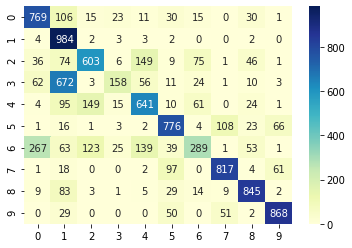

In [63]:
predict_with_bias(rnd_clf,compressed_testX,0.08)

In [84]:
def infer_data_labels(X_labels, cluster_labels):
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
    return predicted_labels

In [85]:
def infer_cluster_labels(kmeans, actual_labels):
    inferred_labels = {}
    for i in range(kmeans.n_clusters):
        labels = []
        index = np.where(kmeans.labels_ == i)
        labels.append(actual_labels[index])
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])#count the occurrence
        else:
            counts = np.bincount(np.squeeze(labels))
        if np.argmax(counts) in inferred_labels:
            inferred_labels[np.argmax(counts)].append(i)
        else:
            inferred_labels[np.argmax(counts)] = [i]
    return inferred_labels

In [82]:
kmeans = KMeans(n_clusters=256, random_state=0).fit(compressed_trainX)
cluster_labels = infer_cluster_labels(kmeans, trainY)
X_clusters = kmeans.predict(compressed_testX)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(classification_report(testY, predicted_labels))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77      1000
           1       1.00      0.92      0.96      1000
           2       0.61      0.60      0.60      1000
           3       0.78      0.84      0.81      1000
           4       0.63      0.60      0.62      1000
           5       0.92      0.82      0.87      1000
           6       0.51      0.42      0.46      1000
           7       0.82      0.89      0.85      1000
           8       0.91      0.94      0.93      1000
           9       0.89      0.91      0.90      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



In [86]:
kmeans = KMeans(n_clusters=256, random_state=0).fit(trainX)
cluster_labels = infer_cluster_labels(kmeans, trainY)
X_clusters = kmeans.predict(testX)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(classification_report(testY, predicted_labels))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76      1000
           1       0.99      0.92      0.96      1000
           2       0.63      0.63      0.63      1000
           3       0.77      0.83      0.80      1000
           4       0.64      0.62      0.63      1000
           5       0.90      0.84      0.87      1000
           6       0.50      0.41      0.45      1000
           7       0.84      0.83      0.84      1000
           8       0.93      0.93      0.93      1000
           9       0.86      0.93      0.89      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



In [12]:
knn = KNeighborsClassifier(n_neighbors=5,p=1,weights="distance")
knn.fit(trainX,trainY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='distance')

In [13]:
y_pred = knn.predict(testX)
print(classification_report(testY, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.74      0.79      0.76      1000
           3       0.91      0.88      0.89      1000
           4       0.77      0.76      0.76      1000
           5       0.99      0.90      0.94      1000
           6       0.64      0.59      0.61      1000
           7       0.91      0.95      0.93      1000
           8       0.98      0.95      0.97      1000
           9       0.92      0.97      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [66]:
scores = []
for depth in range(2,200,3):
    decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth=depth)
    scores.append(validate(decision_tree,compressed_trainX,compressed_testX))
print(np.argmax(scores))
#tree.plot_tree(decision_tree)

3


0.7248


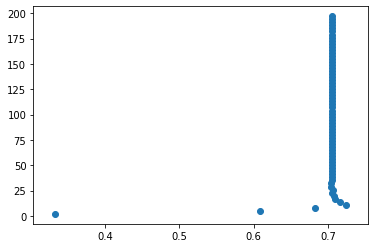

In [72]:
plt.scatter(scores,range(2,200,3))
print(np.max(scores))

In [73]:
best_decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth=11)
best_decision_tree = best_decision_tree.fit(compressed_trainX,trainY)
y_pred = best_decision_tree.predict(compressed_testX)
print(classification_report(testY, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.79      0.72      1000
           1       0.96      0.93      0.94      1000
           2       0.65      0.64      0.64      1000
           3       0.76      0.79      0.77      1000
           4       0.56      0.73      0.64      1000
           5       0.88      0.80      0.84      1000
           6       0.59      0.35      0.44      1000
           7       0.82      0.87      0.84      1000
           8       0.89      0.86      0.88      1000
           9       0.89      0.87      0.88      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



In [77]:
best_decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth=11)
best_decision_tree = best_decision_tree.fit(trainX,trainY)
y_pred = best_decision_tree.predict(testX)
print(classification_report(testY, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1000
           1       0.97      0.93      0.95      1000
           2       0.66      0.70      0.68      1000
           3       0.83      0.80      0.81      1000
           4       0.62      0.76      0.69      1000
           5       0.93      0.88      0.90      1000
           6       0.59      0.46      0.52      1000
           7       0.88      0.91      0.89      1000
           8       0.92      0.91      0.92      1000
           9       0.90      0.91      0.91      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.80     10000
weighted avg       0.81      0.81      0.80     10000



              precision    recall  f1-score   support

           0       0.77      0.69      0.73      1000
           1       0.96      0.91      0.93      1000
           2       0.65      0.63      0.64      1000
           3       0.80      0.77      0.79      1000
           4       0.59      0.70      0.64      1000
           5       0.30      0.95      0.45      1000
           6       0.59      0.35      0.44      1000
           7       0.66      0.08      0.14      1000
           8       0.93      0.31      0.47      1000
           9       0.92      0.72      0.81      1000

    accuracy                           0.61     10000
   macro avg       0.72      0.61      0.60     10000
weighted avg       0.72      0.61      0.60     10000



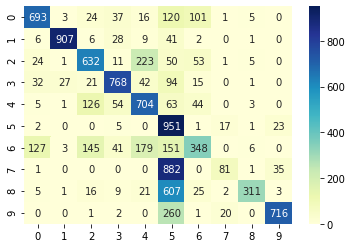

In [75]:
predict_with_bias(best_decision_tree,compressed_testX,0.01,5)

In [55]:
x_train = trainX.reshape(trainX.shape[0], -1) / 255.0
x_test = testX.reshape(testX.shape[0], -1) / 255.0
y_train = to_categorical(trainY)
y_test = to_categorical(testY)

In [56]:
model = Sequential()

model.add(Dense(10, input_dim=784, activation='relu'))#hidden layer
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))#output layer, Softmax - more than two categories,(Sigmoid - two categories)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#loss(multi-categories=categorical_crossentropy, two-categories=binary_crossentropy),optimizer(adam or rmsprop)

In [57]:
model.fit(x_train, y_train, epochs=10, validation_split=0.1)
_, test_acc = model.evaluate(x_test, y_test)
print(test_acc)

Epoch 1/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.6469 - accuracy: 0.7694 - val_loss: 0.4826 - val_accuracy: 0.8298
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4560 - accuracy: 0.8403 - val_loss: 0.4312 - val_accuracy: 0.8462
Epoch 3/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4196 - accuracy: 0.8505 - val_loss: 0.4142 - val_accuracy: 0.8503
Epoch 4/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3999 - accuracy: 0.8545 - val_loss: 0.4085 - val_accuracy: 0.8507
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3879 - accuracy: 0.8584 - val_loss: 0.3933 - val_accuracy: 0.8570
Epoch 6/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3754 - accuracy: 0.8632 - val_loss: 0.4103 - val_accuracy: 0.8488
Epoch 7/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3683 - accuracy: 0.8654 - val_loss: 0.3886 - val_accuracy:

In [61]:
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()
x_train = trainX[:,:,:,np.newaxis] / 255.0
x_test = testX[:,:,:,np.newaxis] / 255.0

In [62]:
model4 = Sequential()
model4.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28, 1))) 
model4.add(MaxPooling2D(pool_size=2))
model4.add(Flatten())
model4.add(Dense(10, activation='softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
model4.summary()
model4.fit(x_train, y_train, epochs=10, validation_split=0.1)
_, test_acc = model4.evaluate(x_test, y_test)
print(test_acc)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                125450    
Total params: 125,770
Trainable params: 125,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1688/1688 [==============================] - 52s 31ms/step - loss: 0.4316 - accuracy: 0.8513 - val_loss: 0.3379 - val_accuracy: 0.8787
Epoch 2/10
1688/1688 [==============================] - 48s 28ms/step - loss: 0.3101 - accuracy: 0.8